# Taller de programación en Python: Complejidad Social y Modelos Computacionales
## Lección Py.6 Modelación de Autómatas Celulares
### Impartido por: Gonzalo Castañeda
Basado en: Downey, Allen B. 2016, "Think Complexity", Needham, Massachusetts: Green Tea Press
Cap 5 y 6

In [ ]:
# Importamos las lbrerías necesarias
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Veamos como trabaja una regla de transición con un autómata celular de 0-dimensiones (0-D)
# en el que un agente va cambiando su estado (atributo) a través del tiempo mediante una
# regla sencilla de comportamiento
n = 10                    # número de periodos a analizar
x = np.zeros(n)           # se crea un vector de ceros (arreglo en numpy)
print(x)

In [ ]:
# Establecemos la regla de transición en la que el operador % (mod) genera el residuo del 
# primer paso de la división: 1%2 = 1, ya que 1/2 = 0.5 y el residuo de 0 es 1); 
# 2%2 = 0  ya que 2/2 = 1 y el residuo de 1 es 0; 3%2 = 1.5 y el residuo de 1 es 1 )
# Esta regla de 'paridad'  asigna un 1 a números nones y un 0 a números pares
x[1] = (x[0] + 1) % 2
x[1]

In [ ]:
# Esta regla se aplica iterativamente para todos los periodos (del 1 al 9 cuando n = 10)
for i in range(1, n):
    x[i] = (x[i-1] + 1) % 2   
print(x)                      # recordar que el primer elemento de la lista corresponde a x[0] = 0
# Se trata, entonces, de un objeto dinámico cuyo estado cambia intermitentemente entre 0 y 1,
# y en este sentido se dice que parpadea en su comportamiento (blink)

## (2)  Autómata celular unidimensional: CA 1-D 

In [ ]:
# Para analizar el comportamiento dinámico, en este caso,  construimos un arreglo
# bidimensional en donde los renglones corresponden al tiempo y las columnas al estado de cada célula
rows = 5
cols = 11
array = np.zeros((rows, cols) , dtype=int)   
                    # en el segundo argumento se especifica que se trata de números enteros  
array[0, 5] = 1     # en las condiciones iniciales se estabece un CA 1-D de 11 celulas con 1 en
                    # la columna 5 del renglón inicial [0]
print(array)

In [ ]:
# Para graficar usamos una librería de pyplot (imshow) que permite cambiar dígitos a imágenes 
# (cuadros). la función cmap genera un mapa de color en el que las células (celdas) 
# con 1 ('on') tienen un tono azul fuerte y las de 0 ('off') un tono azul claro; 
def plot_ca(array):
    plt.imshow(array, cmap='Blues')

In [ ]:
# El diagrama del arreglo con las condiciones iniciales, pero
# sin aplicar aún la regla de transición quedaría: 
plot_ca(array)

Aplicamos de forma iterativa la regla de transición del CA de 1-D en el que se aplica la
regla de paridad a la suma de los estados de los integrantes de cada vecindad con k = 3.
Es decir, se define la función de actualización del CA, especificando como argumento el estado de las células de la vecindad en el periodo (t)

In [ ]:
def step(array, t):
    """Calcular el renglón (periodo) t de un CA.
    """
    rows, cols = array.shape           # Este paso no es necesario, solo para recordar
    row = array[t-1]                   # En row se guardan los estado que tenían las celdas en t - 1
    for j in range(1, cols):
        elts = row[j-1:j+2]            # Se supone que en este CAS las vecindades son de tres miembros
                                       # uno antes y uno después de la celula central (j)
        array[t, j] = sum(elts) % 2    # sumamos los valores de 1 y establecemo la regla de paridad

In [ ]:
# por lo pronto checamos el segundo renglón t = 1
step(array, 1)
plot_ca(array)

Automáta celular de 1-D con regla de transición de 'paridad' que usa en su algoritmo un loop
para actualizar los estados:

In [ ]:
# Iteramos con un for para aplicar la regla de transición en cada paso (periodo)
for t in range(1, rows):
    step(array, t)
# Creamos la imagen de todo el arreglo bidimensional, en el que renglones corresponden al tiempo
plot_ca(array)

## (3) Un algoritmo alternativo: el método de 'correlación cruzada'

Este algoritmo alternativo puede ser mucho más rápido.
La 'correlación cruzada' de un arreglo $a$ con una ventana (plantilla), w, genera un nuevo arreglo, $c$, cuyo k-ésimo elemento se define de la siguiente manera: 

$ c_k = \sum_{n=0}^{N-1} a_{n+k} \cdot w_n $

En Python se calcula el elemento '$k$' de la siguiente forma:

In [ ]:
# Creamos una función para el cálculo de la 'correlación cruzada'
def c_k(a, w, k):
    """Calcular el elemento k de la 'correlación cruzada' entre a y w.
    """
    N = len(w)                     # tamaño de la ventana
    return sum(a[k:k+N] * w)       # aplicamos la sumatoria, notar que el tamaño de la ventana
                                   # debe coincidir con el tamaño del 'slicing' del arreglo

In [ ]:
# Veamos que efectivamente funciona:
# En primer término creamos un arrego unidimensional con diez dígitos
N = 10
row = np.arange(N, dtype=int)
print(row)

In [ ]:
# Y definimos a la ventana con tres elementos
window = [1, 1, 1]
print(window)

In [ ]:
# Con este tipo de ventana unitaria, cada elemento de c es la suma de los estados de k y de los dos
# estados subsecuentes del arreglo. Asi para k = 0 se tiene que
c_k(row, window, 0)                   # Checar que efectivamente 0 + 1 + 2 = 3

In [ ]:
# Mientras que para k = 1 
c_k(row, window, 1)                   # Checar que efectivamente 1 + 2 + 3 = 6

In [ ]:
# La siguiente función calcula todos los elementos k de c en los que triadas del arreglo
# se traslapan con la ventana
def correlate(row, window):
    """Calcular la correlación cruzada de a y w.
    """
    cols = len(row)
    N = len(window)
    c = [c_k(row, window, k) for k in range(cols-N+1)]   # aplicamos una compresión de instrucciones
                                                         # para crear la lista c
                                                         # si N = 3 el rango sería 10-3 + 1 =  8
                                                         # es decir, toma la última triada posible
    return np.array(c)                                   # convertimos la lista en un arreglo
c = correlate(row, window)     # invocamos la función
print(c)

In [ ]:
# Debido a que esta operación es común en muchas aplicaciones, ya existe en Numpy un método
# para esta operación definido como'correlate'
c = np.correlate(row, window, mode='valid')    # Notar que se obtiene el mismo resultado que arriba
print(c)                                       # recordar que aquí row es el nombre del arreglo

El modo = 'valid' en np. correlate opera solo con las triadas traslapadas con la ventana. 
El problema es que el arreglo final con los resultados tiene una dimensión menor a la del 
arreglo inicial; se sugiere entonces usar el modo = 'same' que añade valores cero en ambos 
lados del arreglo inicial. Ojo: se estaría estudiando un CA con fronteras (i.e., no-periódico) ya
que las células en la frontera tienen menos vecinos

In [ ]:
c = np.correlate(row, window, mode='same')
print(c)
# Por lo tanto, para contruir una función 'def correlate' equivalente tendríamos que usar np.pad 
# que agrega ceros al inicio y al final de `row`: np.pad(row, 1, 'constant')

Automáta celular de 1-D con regla de 'paridad' que usa en su algoritmo el método correlate de numpy para calcular la suma de los estados en la vecindad

In [ ]:
# Volvemos a hacer todo el proceso con el primer ejemplo, pero ahora usando el método 
# 'correlate' de Numpy
# primer paso: inicialización del arreglo bidimensional tiempo (renglones) - espacio (columnas)
rows = 5
cols = 11
array = np.zeros((rows, cols), dtype=int)
array[0, 5] = 1
print(array)

In [ ]:
# Segundo paso: actualización de los renglones del arreglo al aplicar la regla de transición de
# paridad en cada triada traslapada que se obtienen con 'correlate'
def step2(array, t, window=[1,1,1]):               # Aplicación de la regla de transición
    """Calcular row t de un CA.
    """
    row = array[t-1]
    c = np.correlate(row, window, mode='same')     # aquí se obtienen las sumas en las vecindades
    array[t] = c % 2                               # aquí se aplica la regla de paridad para
                                                   # modificar el estado de la celda central de
                                                   # cada vecindad

In [ ]:
# Tercer paso: observación de resultados (descripción gráfica)
for t in range(1, rows):
    step2(array, t)           # Se invoca a la regla de transición en cada periodo
plot_ca(array)                # Notar que el algoritmo es mucho más compacto

## (4) Un algoritmo más general que puede aplicarse a cualquier CA 1-D usando las Tablas de transiciones de los estados

Los algoritmos anteriores son apropiados cuando la regla de transición es de tipo 'totalistica'; 
es decir, hase uso de la suma de los estados de los vecinos sin importar la posición que tienen los
0s y los 1s en las triadas. 
En algunos CA, y sus reglas de transición, las triadas 001 y 100 difieren por la posición que tienen los 1s a pesar de que la suma de los estados sean iguales. 

Clasificación de los CA 1-D:
    
La siguiente función define a los valores binarios que adoptan las células 
centrales de las 8 posibles configuraciones de un CA 1-D una vez que se da como insumo el
valor decimal con que se define a la regla de transición

In [ ]:
# Transformación de números decimales a binarios:
def make_table(rule):
    """Crea la tabla (los valores binarios 
         asignados a c/u de las 8 configuraciones)
         a partir de las reglas
         de transición (enteros entre 0 y 255)
  
    returns: un arreglo de 8 0s and 1s
    """
    rule = np.array([rule], dtype=np.uint8) # crea un arreglo 1 x 1 con el número como único elemento
    table = np.unpackbits(rule)[::-1]       # descompone al número decimal en notación binaria
    return table
# Veamos un ejemplo:
table = make_table(150)
print(table)

#### Denominación de las reglas para autómatas celulares 1-D
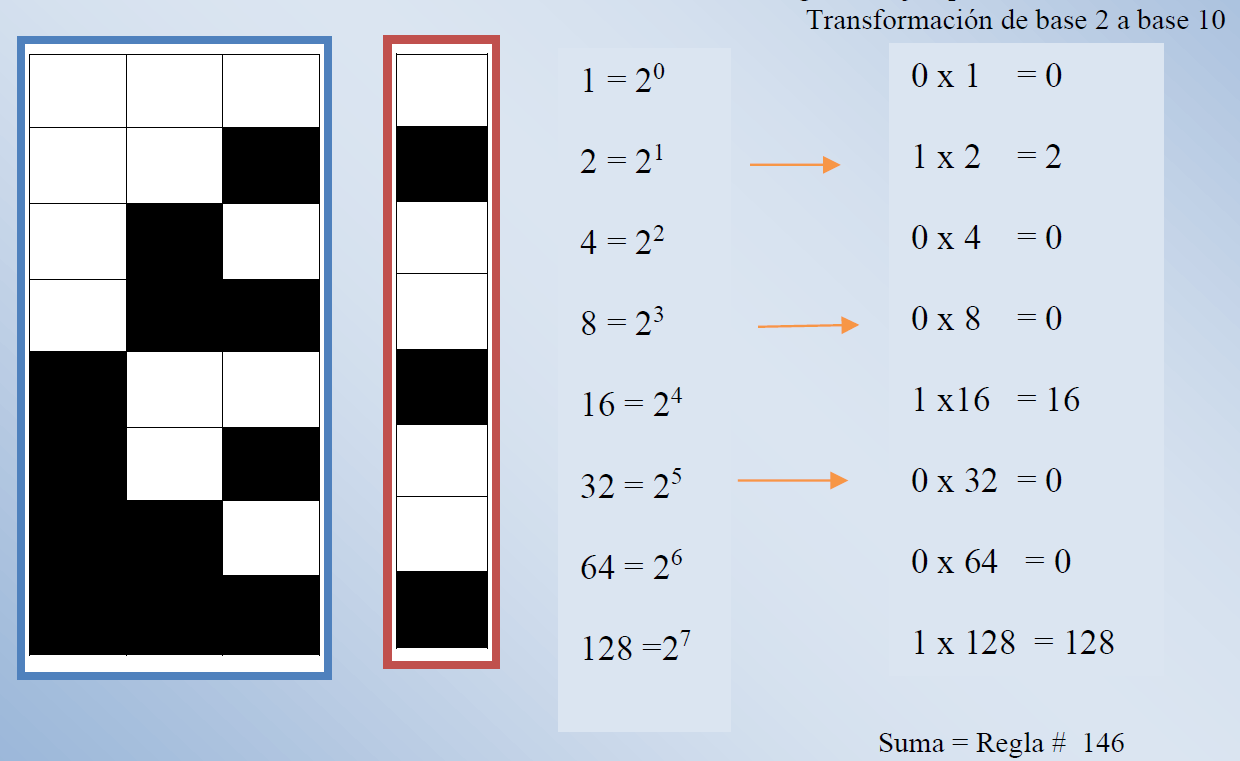

Truco: si correlacionamos al arreglo con la ventana [4, 2, 1] establecemos el índice de la tabla
de transiciones que corresponde a la triada de vecinos en custión.
Por ejemplo: (000) * [4,2,1] = 0 = primera configuración de la tabla
Otro ejemplo: (111) * [4,2,1] = 7 = octava configuración de la tabla

#### Tabla de una regla de transición para un CA 1-D. Las posiciones de las triadas se identifican con el índice que se genera con las correlaciones cruzadas:
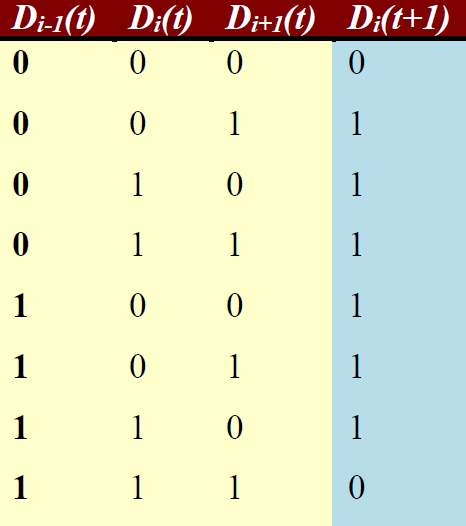


In [ ]:
window = [4, 2, 1]
c = np.correlate(array[0], window, mode='same')
print(array[0])    # Estado inicial de las células
print(c)           # Muestra la posición de la Tabla de transición a la que corresponde la triada 
                   # asociada a cada célula central
                   # Por ejemplo, la celda antes del uno en las condiciones iniciales
                   # forma parte de una trida (001), la cual corresponde a la segunda
                   # configuración de la table (posición 1); la triada (010) corresponde a la
                   # tercera configuración de la tabla (posición 2)

In [ ]:
# De acuerdo con estas posiciones, los estados asociados en el siguiente periodo vienen dados por:
array[1] = table[c]      # En table estan los valores del periodo siguiente
                         # asociados a las posiciones 0 1, 2 y 4
                         # Recordar que para regla 150: table = [0 1 1 0 1 0 0 1]
                         # valor 1 en c (posición) corresponde al valor 1 el la Tabla; 
                         # valor 2 en c al 1 y valor 4 en c al 1
print(array[1])          # por lo que quedan tres 1s en las células centrales

In [ ]:
# Por lo tanto, la función que aplica la regla de transicióm en cada periodo es la siguiente
def step3(array, t, window=[4,2,1]):
    """Calcular el renglón t de un CA.
    """
    row = array[t-1]                               # guardamos los estados actuales en un arreglo row 
    c = np.correlate(row, window, mode='same')     # generamos los índices de posición
    array[i] = table[c]                            # actualizamos el arreglo

In [ ]:
# Actualizamos para cada periodo la aplicación de la regla y observamos los resultados
# en un diagrama espacio - tiempo
for i in range(1, rows):
    step3(array, i)
plot_ca(array)

## (5)  Un ejemplo de CA 2-D: El juego de la vida

#### Regla de transición del juego de la vida:
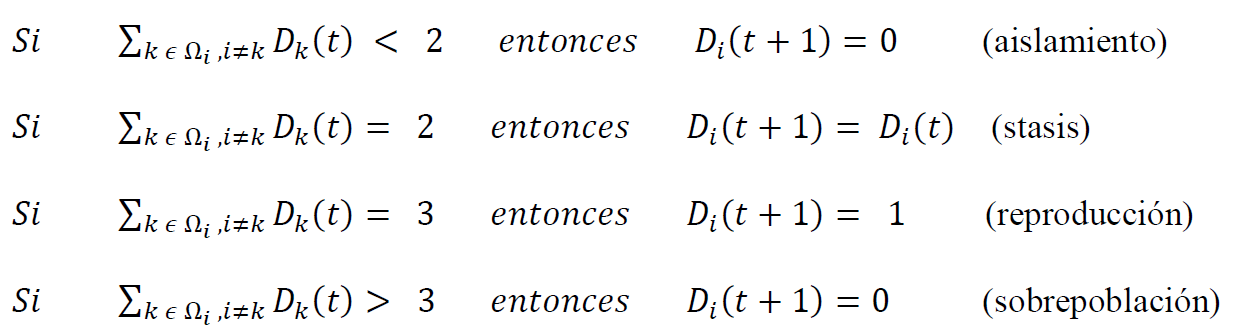

In [ ]:
# De nueva cuenta tenemos que iniciar con un arreglo para inicializar los estados.
# aunque en este caso el arreglo 2-D solo describe lo valores binarios en un cierto periodo
a = np.random.randint(2, size=(10, 10))  # elige al azar uno de dos enteros del conjunto {0, 1}
                                         # genera valores en una matriz 10 x 10
print(a)

En un primer algoritmo del Juego de la Vida establecemos la regla de transición mediante un loop doble

In [ ]:
# Establecemos una nueva matriz, 'b', similar a la de 'a'
b = np.zeros_like(a)                     # esto se hace para almacenar la configuración en t + 1                      
rows, cols = a.shape
for i in range(1, rows-1):               # nos movilizamos por renglones y columnas
    for j in range(1, cols-1):           # para modificar los estados de toda la matriz           
        state = a[i, j]                  # identificamos el valor de la célula central
        neighbors = a[i-1:i+2, j-1:j+2] 
                        # mediante un slice, seleccionamos las celdas de la vecindad
                        # se trata de una vecindad de Moore que incluye la celda
                        # central y 8 vecinos en un radio de 1 (ariba, abajo, antes, después)
        k = np.sum(neighbors) - state 
                        # sumamos los valores de los vecinos y quitamos el del centro
        if state:
            if k==2 or k==3:  # si la celda central está viva (1 => True) y la suma es 2 o 3                          
                b[i, j] = 1   # se le asigna un 1 
        else:
            if k == 3:   # si esta muerta (0 => False) y hay 3 vecinos se le asigna un 1
                b[i, j] = 1
                         # en los demas casos se deja el 0
print(b)

In [ ]:
# Un algoritmo alternativo, mas compacto y rápido utiliza el metodo correlate
from scipy.signal import correlate2d            # importamos el método de scipy para 2-D
kernel = np.array([[1, 1, 1],                   # Ahora usamos una plantilla bidimensional que
                   [1, 0, 1],                   # corresponde a la matriz Moore
                   [1, 1, 1]])
c = correlate2d(a, kernel, mode='same')        # aplicamos el método de correlación cruzada
b = (c==3) | (c==2) & a                        # Con esta operación boolena asignamos True (1)
                                               # cuando hay tres vecinos con 1 (True) o cuando
                                               # hay dos vecinos con 1 (true) y la celda central 
                                               # en t era 1 (true)
                                               # Ojo la operación binaria se lee de izquierda a 
                                               # derecha: primero la unión (|) y lurgo intersección(&) 
b = b.astype(np.uint8)                         # Cambiamos el valor booleano por el binario 0 o 1
print(b)

In [ ]:
# Si a la celda central del kernel (o plantilla) le damos un valor de 10, la lógica del algoritmo
# se simplifica
kernel = np.array([[1, 1, 1],
                   [1,10, 1],
                   [1, 1, 1]])
c = correlate2d(a, kernel, mode='same')
b = (c==3) | (c==12) | (c==13)    # si la célula central de la vecindad Moore es 0, esta correlación
                          # cruzada toma valores entre 0 y 8, si el centro es 1 el resultado
                          # quedará entre 10 y 18. Por lo tanto, le asignaremos verdadero (1)
                          # solo en tres casos posibles: la célula central está muerta (0) y hay
                          # exactamente tres células vivas (1) => c == 3; cuando la célula central
                          # esta viva y hay exactamente dos vecinos vivos => c == 12; cuando la
                          # celula central esta viva y hay tres vecinos vivos => c == 13
b = b.astype(np.uint8)    # cambiamos de booleano a binario
print(b)

In [ ]:
# la segunda versión del kernel hace posible apelar a una tabla en la que se identifican los
# valores de la correlación cruzada en la vecindad Moore que deben adoptar el valor binario 1, 
# mientras que al resto de los valores de un arreglo de 20 se le asigna el cero
table = np.zeros(20, dtype=int)      # se genera una tabla de ceros
table[[3, 12, 13]] = 1     
                    # se asignan 1s solo en las posiciones 3, 12 y 13 como en la operación lógica  
c = correlate2d(a, kernel, mode='same')   # cuando usamos el resultado de c como un índice de la tabla
b = table[c]        # checamos el valor que hay en esa posición y se lo asignamos al nuevo arreglo
print(b)            # Notar que queda el mismo arreglo que el que obtuvimos arriba

In [ ]:
# Con este nuevo algoritmo procedemos a crear dos funciones; una para aplicar la actualización de
# estados (regla de transición) y otra para dibujar con imágenes (cuadros de color)
# los resultados del arreglo
def step4(a, kernel):
    table = np.zeros(20, dtype=np.uint8)
    table[[3, 12, 13]] = 1
    c = correlate2d(a, kernel, mode='same')
    b = table[c]
    return b
a = step4(a, kernel)
print(a)

In [ ]:
# Aqui transformamos los números binarios en colores
def draw_array(array):
    """Dibujar las celdar de un arreglo 2-D con tonos de verde"""
    n, m = array.shape
    plt.axis([0, m, 0, n])    # longitud de los ejes
    plt.xticks([])            # excluyo los tics de los dos ejes (marcas de 1 a 10)
    plt.yticks([])            # Otra forma: plt.axis('off')

    return plt.imshow(array, cmap='Greens')
draw_array(a)

In [ ]:
# Dibujamos una secuencia de 5 estados adicionales del Juego de la Vida a partir de las condiciones
# iniciales
a = np.random.randint(2, size=(10, 10))
draw_array(a)
plt.show()
for t in range(0, 5):
    a = step4(a, kernel)
    draw_array(a)
    plt.show()

In [ ]:
fig = plt.figure(figsize=(10,10))    # Ahora la figura va a ser de mayor tamaño
draw_array(a)
plt.axis('off')                      # Quitamos los tics de los ejes

In [ ]:
# A continuación se hace una animación con 100 iteraciones del Juego de la Vida
from matplotlib.animation import FuncAnimation  # Importamos métodos de librería de animación
fig = plt.figure(figsize=(10,10))
im = plt.imshow(a, cmap='Greens')    # Establecemos la condición inicial con el último arreglo
plt.axis('off')
def update(i):                  # rutina para actualizar los frames de la animación
    global a                    # definimos a como una variable global, lo que permite que
    a = step4(a, kernel)        # los cambios hechos dentro de la función sean validos afuera de ella
    im.set_array(a)
    return im, 
anim = FuncAnimation(fig, update, frames=100, interval=20)  # interval define las pausas entre
                                                            # cada frame
anim.save('life.gif', dpi=80, writer='imagemagick')         # se guardan las imagenes en un archivo
                                                            # gift que se almacena en dashboard 

## (6) Creación de objetos en el espacio del Juego de la Vida

In [ ]:
# Construimos un arreglo bidimensional para definir el entorno y en la parte de arriba a la zquierda
# posicionamos al objeto de dimensión (n, m)
def make_life(n, m, row, col, *strings):
    """Cramos un objeto predeterminado.
    
    n, m: renglones y columnas en el espacio del juego
    row, col: coorenadas superior izquierda en donde se posicionara el objeto
    strings: lista de strings con valores binarios '0' y '1'
    """
    array = np.zeros((n + 5, m + 5), dtype=np.uint8)   # Creamos un arreglo de ceros más grande 
    for i, s in enumerate(strings):   # que el objeto; tomamos una porción del arreglo
                                      # para insertar el objeto en cuestión
                                      # la i selecciona No.de cadena, la s los distintos string
        array[row+i, col:col+m] = [int(b) for b in s]    # usamos una compresión para ir
                                      # cambiando str por enteros, uno a uno
                                      # hacemos un slice para el renglón 0 y así sucesivamente
    return array

In [ ]:
# Rutina para dibujar los arreglos a partir de imágenes de color 
def draw_array(array):
    """Dibujar las celdas de un arreglo 2-D con tonos de verde"""
    fig = plt.figure(figsize=(5,5)) 
    plt.axis('off')
    return plt.imshow(array, cmap='Greens')

In [ ]:
# Ejemplo 1: Objeto conocido como beehive
life = make_life(3, 4, 0, 0, '0110', '1001', '0110')
print(life)
draw_array(life)     # Tiene la siguiente forma

In [ ]:
# Otro ejemplo: glider
plt.figure(figsize=(12, 4))
glider = ['010', '001', '111']
life = make_life(3, 3, 0, 0, *glider)
draw_array(life)

In [ ]:
# Glider: un objeto dinámico
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
glider = ['010', '001', '111']
life = make_life(3, 3, 0, 0, *glider)
draw_array(life)                             # lo dibujamos en el espacio
kernel = np.array([[1, 1, 1],                # plantilla
                  [1,10, 1],
                  [1, 1, 1]])
table = np.zeros(20, dtype=np.uint8)    # Un vector de tamaño 20 es suficiente ya que con la
                                        # plantilla elegida no puede haber mas de 20 valores en c
table[[3, 12, 13]] = 1                       
for i in range(1, 18):                   # Vamos a imprimir la secuencia de estados con un glider
    c = correlate2d(life, kernel, mode='same')   
    life = table[c]                     # con las posiciones identificadas en 'table' asignamos
                                        # los nuevos estados con la regla de transición
    draw_array(life)                    # Notar que Glider se mueve diagonalmente hacia abajo

## (7) Formato para estructurar algoritmos de sistemas complejos

A continuación se presenta un protocolo para la creación de algoritmos desarrollado por Hiroki Sayama en su libro de texto "Introduction to the Modeling and Analysis of Complex Systems", disponible en versión electrónica y en PDF en la siguiente dirección: https://math.libretexts.org/Bookshelves/Scientific_Computing_Simulations_and_Modeling/Book%3A_Introduction_to_the_Modeling_and_Analysis_of_Complex_Systems_(Sayama)
En particular, el capítulo 10: Interactive Simulations of Complex Systems presenta una explicación de este formato, el cual resulta muy útil para la construcción de autómatas celulares y modelos
basados an agentes en general

In [ ]:
# Importar las librerías y módulos que sean necesarios para correr el modelo 
# definir los parámetros del modelo

def initialize():
    global # enlistar variables globales
    # inicializar los estados del sistema
    
def observe():
    global # enlistar variables globales
    cla() # limpiar el espacio de visualizaciones
    # visualizar los estados del sistema

def update():
    global # enlistar variables globales
    # actualizar los estados del sistema en tiempo discreto

# Ojo: no correr esta celda del Notebook, se presenta solo para explicar el formato

A manera de ilustrar la utilización del protocolo veamos el siguiente ejemplo:
Generación de partículas que se mueven en una caminata aleatoria en un espacio bidimensional

In [ ]:
# Librerías y parámetros
import random as rd                     # Para generar números aleatorios
import matplotlib.pyplot as plt         # Para graficar
n = 1000 # número de partículas
sd = 0.1 # desviación estándar de ruido Gaussiano

# Paso de inicialización de los estados
def initialize():
  global xlist, ylist                  # Creamos dos listas para las coordenadas de las partículas
  xlist = []
  ylist = []
  for i in range(n):                   # Ubicamos a las partículas en el espacio bidimensional
   xlist.append(rd.gauss(0, sd))
   ylist.append(rd.gauss(0, sd))

# Paso de generación de visualizaciones
def observe():
  global xlist, ylist
  plt.clf()                          # Se limpia la figura entre una iteración y otra
                                     # para no encimar los datos
  plt.plot(xlist, ylist, '.')        # '.' indica que se hará un diagrama de dispersión por lo
                                     # que estos puntos no se conectan con una línea 
# Paso de actualización de estados
def update():
 global xlist, ylist
 for i in range(n):                    # En este caso los estados son las nuevas coordenadas en las
                                       # que se posicionan las particulas
  xlist[i] += rd.gauss(0, sd)          # a los valores originales se les suma un factor de          
  ylist[i] += rd.gauss(0, sd)          # desplazamiento también gaussiano

# Invocamos las tres primeras funciones para gráficar la visualización inicial
print('Inicialización del proceso:')
initialize()
observe()
update()


In [ ]:
# Iteramos las funciones para veces hasta llegar al periodo 20 en el que se grafica
# la visualización final:
for i in range (0, 19):
    observe()
    update()
print('Esta es la visualización del espacio bidimensiona en t =' + ' ' + str(20))

## (8) Un ejemplo de un CAS 2-D: el modelo del pánico

En el siguiente modelo se analiza, a través de un CA 2D, un modelo de pánico en el que la regla de 
transisión describe el comportamiento de individuos una vez que se enciende una alarma de fuego
en un lugar cerrado (e.g. un gimnasio). Si se suponen vecindades tipo Moore la regla es la siguiente:
(i) Un individuo calmado, ubicado en la celda central, entrará en pánico si está rodeado de cuatro 
o más vecinos apanicados.
(ii) Un individuo apanicado no logrará calmarse si tres de sus vecinos o más estan apanicado; 
de ser menos volverá a la normalidad.

La regla de transición puede simplificarse de la siguiente manera: Un individuo presentará un 
estado de pánico si está rodeado de 4 o más vecinos apanicados; de lo contrario se calmará. 
Es decir, si el conteo es de tres y ya estaba en panico no hay que hacer cambios porque se
mantiene en pánico; si estaba calmado lo seguirá estando

Supuestos adicionales: el estado inicial se determina aleatoriamente con una probabilidad, p, de
estar en pánico; el espacio de interacción presenta fronteras periódicas (i.e., un torus)

In [ ]:
import matplotlib
from pylab import *              # Esta librería nos ayuda a la graficación

n = 100 # tamaño del espacio: n x n
p = 0.1 # probabilidad inicial de estar en  pánico (i.e.,en el momento en que suena la alarma)
# Para evitar confusiones creamos dos arreglos bi-dimensionales para reflejar los estados
# del sistema en periodos sucesivos
# En un primer paso inicializamos el arreglo
def initialize():
    global config, nextconfig           # los arreglos se definen como variables globales para
                                        # usarlos dentro y fuera de las funciones
    config = zeros([n, n])              # empezamos con un arreglo de ceros              
    for x in range(n):                  # con los loops anidados sondeamos la matriz para                                    
        for y in range(n):              # establecer los estados al azar
            config[x, y] = 1 if random() < p else 0     # Ojo: Notar sintáxis del if
                                    # primero vienen las instrucciones y luego el condicionamiento
    nextconfig = zeros([n, n])          # esta es la matrix de salida

In [ ]:
# En el segundo paso del algoritmo se hacen las visualizaciones
def observe():
    global config, nextconfig
    clf()
    im = imshow(config, vmin = 0, vmax = 1, cmap = cm.binary) #transforma dígitos a imágenes
    return im 

Para aplicar la regla de transición tenemos que hacer un conteo de los estados entre los vecinos.
Los vecinos están a un radio de longitud uno de la celda central (x', y´):
    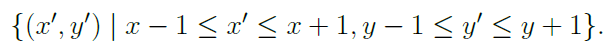
Si hacemos un loop anidado podemos tomar todos los vecinos que estan contenidos en los intervalos
[-1, 1] Con valores discretos nuestro iterador dx o dy elige valores de la siguiente
lista [-1, 0. 1] que definen las distancias con respecto a las coordenadas x, y en que se ubica el
agente central

In [ ]:
# El tercer paso define la regla de transición con la que se actualizan los estados
def update():
    global config, nextconfig
    for x in range(n):
        for y in range(n):
            count = 0
            for dx in [-1, 0, 1]:                # loops anidados
                for dy in [-1, 0, 1]:
                    count += config[(x + dx) % n, (y + dy) % n] # hacemos el conteo de estados con 1
                                                                # que corresponde a pánico                      
            nextconfig[x, y] = 1 if count >= 4 else 0
    config, nextconfig = nextconfig, config

Notar que el operador de % permite generar espacios periodicos: la celda en la coordenada 98 tiene
vecinos en las coordenadas 97 y en la 99. Pero la celda en la coordenada (n-1 =) 99 ya está en la 
frontera -¿Cuál es entonces su vecino de la derecha?- En este caso x + dx = 99+1 = 100, por lo que
100 % 100 => residual de la división = 0; es decir, su vecino se encuentra al inicio del arreglo, y
de ahí la forma de torus

In [ ]:
# Aplicamos las tres funciones
initialize()    # inicializa los arreglos con estados aleatorios
observe()       # grafica el estado inicial
update()        # actualiza con la regla de transición

In [ ]:
# En el siguiente loop hacemos 18 iteraciones más, pero solo hacemos la impresión del espacio
# que se genera en la número 18, más las dos que ya teníamos antes da un total de 20.
for i in range (0, 18):
    observe()
    update()
print('Esta es la situacion en el gim en t =' + ' ' + str(20))

In [ ]:
# En la siguiente rutina se van guardando las imágenes de los distintos espacios (frames)
# para visualizar su movimiento a lo largo del tiempo.
from matplotlib.animation import FuncAnimation
fig = plt.figure(figsize=(5,5))
initialize()
def update2(i):
    observe()
    update()
    return im
anim = FuncAnimation(fig, update2, frames=3, interval=500)  # interval define las pausas entre
                                                            # cada frame
anim.save('panic.gif', dpi=80, writer='imagemagick')

Para una mejor visualización del modelo se recomienda utilizar PyCX un simulador interactivo de 
modelos dinámicos desarrollado por Hiroki Sayama, los códigos se encuentran disponibles en el
siguiente URL: https://github.com/hsayama/PyCX/  En particular el script de python se llama
ca-panic.py y está dsiponible en https://github.com/hsayama/PyCX/blob/master/ca-panic.py
Para usuarios de Spyder es necesario seguir las siguientes instrucciones para poder correr el modelo:
Ir a la pestaña Run y elegir la siguiente secuencia: "Run" -> "Configuration per file" and select 
"Execute in an external system terminal". 